In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## Define variables and read files

In [2]:
colName=["Energy", "Aeff", "Err", "Nthrown", "Npassed", "weight_thrown", "Veff","Err_Veff"]
default = pd.read_csv("/users/PCON0003/cond0068/ARA/AraSim/veffs/Veff_default.txt",names=colName)
sigma_up = pd.read_csv("/users/PCON0003/cond0068/ARA/AraSim/veffs/Veff_sigma_up.txt",names=colName)
sigma_low = pd.read_csv("/users/PCON0003/cond0068/ARA/AraSim/veffs/Veff_sigma_low.txt",names=colName)
askaryan_up = pd.read_csv("/users/PCON0003/cond0068/ARA/AraSim/veffs/Veff_askaryan_up.txt",names=colName)
askaryan_low = pd.read_csv("/users/PCON0003/cond0068/ARA/AraSim/veffs/Veff_askaryan_low.txt",names=colName)
Latten_up = pd.read_csv("/users/PCON0003/cond0068/ARA/AraSim/veffs/Veff_Latten_up.txt",names=colName)
Latten_low = pd.read_csv("/users/PCON0003/cond0068/ARA/AraSim/veffs/Veff_Latten_low.txt",names=colName)
nofz_up = pd.read_csv("/users/PCON0003/cond0068/ARA/AraSim/veffs/Veff_nofz_up.txt",names=colName)
nofz_low = pd.read_csv("/users/PCON0003/cond0068/ARA/AraSim/veffs/Veff_nofz_low.txt",names=colName)
# pyrex = pd.read_csv("/users/PCON0003/cond0068/ARA/AraRoot/analysis/ARA_analysis/veff/pyrex_veff.csv",names=colName)

In [3]:
default=default.sort_values(by='Energy')
default=default.reset_index()
default = default.drop("index",axis=1)

sigma_up=sigma_up.sort_values(by='Energy')
sigma_up=sigma_up.reset_index()
sigma_up = sigma_up.drop("index",axis=1)
sigma_low=sigma_low.sort_values(by='Energy')
sigma_low=sigma_low.reset_index()
sigma_low = sigma_low.drop("index",axis=1)


askaryan_up=askaryan_up.sort_values(by='Energy')
askaryan_up=askaryan_up.reset_index()
askaryan_up = askaryan_up.drop("index",axis=1)
askaryan_low=askaryan_low.sort_values(by='Energy')
askaryan_low=askaryan_low.reset_index()
askaryan_low = askaryan_low.drop("index",axis=1)


Latten_up=Latten_up.sort_values(by='Energy')
Latten_up=Latten_up.reset_index()
Latten_up = Latten_up.drop("index",axis=1)
Latten_low=Latten_low.sort_values(by='Energy')
Latten_low=Latten_low.reset_index()
Latten_low = Latten_low.drop("index",axis=1)


nofz_up=nofz_up.sort_values(by='Energy')
nofz_up=nofz_up.reset_index()
nofz_up = nofz_up.drop("index",axis=1)
nofz_low=nofz_low.sort_values(by='Energy')
nofz_low=nofz_low.reset_index()
nofz_low = nofz_low.drop("index",axis=1)



### Cross section systematics

#### Effective area

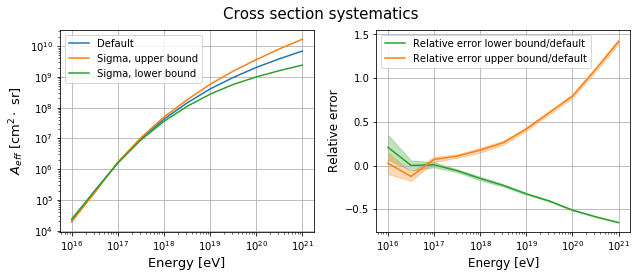

In [4]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(9, 4))

ax[0].loglog(default["Energy"], default["Aeff"], label="Default")
ax[0].plot(sigma_up["Energy"], sigma_up["Aeff"], label="Sigma, upper bound")
ax[0].plot(sigma_low["Energy"], sigma_low["Aeff"], label="Sigma, lower bound")

ax[0].fill_between(default["Energy"],default["Aeff"]-default["Err"],default["Aeff"]+default["Err"], alpha=0.5)
ax[0].fill_between(sigma_up["Energy"],sigma_up["Aeff"]-sigma_up["Err"],sigma_up["Aeff"]+sigma_up["Err"], alpha=0.5)
ax[0].fill_between(sigma_low["Energy"],sigma_low["Aeff"]-sigma_low["Err"],sigma_low["Aeff"]+sigma_low["Err"], alpha=0.5)


ax[0].set_xlabel("Energy [eV]",fontsize=13)
# plt.title("Comparison std & upper bound of L_atten", fontsize=12)
ax[0].set_ylabel("$A_{eff}$ [cm$^2 \cdot$ sr]",fontsize=13)
ax[0].grid()
ax[0].legend()

#####

ax[1].plot(sigma_low["Energy"],(sigma_low["Aeff"]-default["Aeff"])/default["Aeff"],c="C2",label="Relative error lower bound/default")
ratio2 = (sigma_low["Aeff"]-default["Aeff"])/default["Aeff"]
err_ratio2 = np.sqrt((sigma_low["Err"]/default["Aeff"])**2+(sigma_low["Aeff"]*default["Err"]/default["Aeff"]**2)**2)
ax[1].fill_between(sigma_low["Energy"],ratio2-err_ratio2,ratio2+err_ratio2, color="C2",alpha=0.3)

ax[1].plot(sigma_up["Energy"],(sigma_up["Aeff"]-default["Aeff"])/default["Aeff"],c="C1", label="Relative error upper bound/default")
ratio = (sigma_up["Aeff"]-default["Aeff"])/default["Aeff"]
err_ratio = np.sqrt((sigma_up["Err"]/default["Aeff"])**2+(sigma_up["Aeff"]*default["Err"]/default["Aeff"]**2)**2)
ax[1].fill_between(sigma_up["Energy"],ratio-err_ratio,ratio+err_ratio,color="C1",alpha=0.3)

ax[1].set_xscale('log')
# plt.title("abs(with-without)/with", fontsize=14)
ax[1].set_ylabel("Relative error", fontsize=12)
ax[1].set_xlabel("Energy [eV]", fontsize=12)
ax[1].grid()

plt.legend(loc='best')
plt.suptitle("Cross section systematics", fontsize=15)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.savefig("/users/PAS0654/osu8354/ARA/AraSim/AraSim_versions/a23_4yr_diffuse_simconfigs/results/plots/Aeff_comparison_sigma.png", dpi=250)
sigma_low.to_csv("/users/PAS0654/osu8354/ARA/AraSim/AraSim_versions/a23_4yr_diffuse_simconfigs/results/sigma_low_systematics.csv", index=False, index_label=False)
sigma_up.to_csv("/users/PAS0654/osu8354/ARA/AraSim/AraSim_versions/a23_4yr_diffuse_simconfigs/results/sigma_up_systematics.csv", index=False, index_label=False)
default.to_csv("/users/PAS0654/osu8354/ARA/AraSim/AraSim_versions/a23_4yr_diffuse_simconfigs/results/default.csv", index=False, index_label=False)

    

#### Histogram of (weighted) passed events

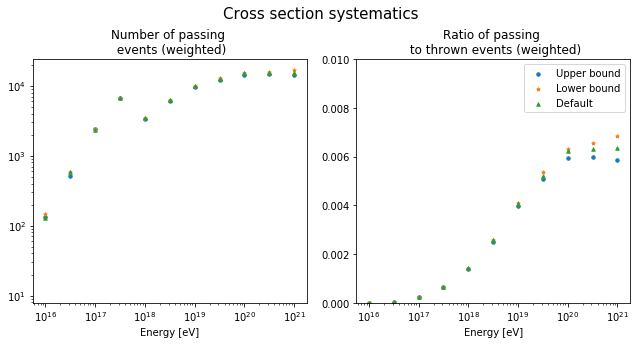

In [5]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(9, 5))

axes[0].scatter(sigma_up["Energy"],sigma_up["Npassed"], s=12, label="Upper bound")
axes[0].scatter(sigma_low["Energy"],sigma_low["Npassed"], s=12,marker="*", label="Lower bound")
axes[0].scatter(default["Energy"],default["Npassed"], s=12,marker="^", label="Default")

axes[0].set_xscale('log')
axes[0].set_yscale('log')
axes[0].set_title("Number of passing \n events (weighted)")
axes[0].set_xlabel("Energy [eV]")


axes[1].scatter(sigma_up["Energy"],sigma_up["Npassed"]/sigma_up["Nthrown"],s=12, label="Upper bound")
axes[1].scatter(askaryan_low["Energy"],sigma_low["Npassed"]/sigma_low["Nthrown"],s=12, marker="*", label="Lower bound")
axes[1].scatter(default["Energy"],default["Npassed"]/default["Nthrown"],s=12, marker="^", label="Default")

axes[1].set_xscale('log')
axes[1].set_title("Ratio of passing \n to thrown events (weighted)")
axes[1].set_xlabel("Energy [eV]")
axes[1].set_ylim(0,0.01)

# axes[1].set_yscale('log')
plt.legend()
plt.suptitle("Cross section systematics", fontsize=15)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()
fig.savefig("/users/PAS0654/osu8354/ARA/AraSim/AraSim_versions/a23_4yr_diffuse_simconfigs/results/plots/sigma_passing.png", dpi=250)

### Askaryan systematics

#### Effective area

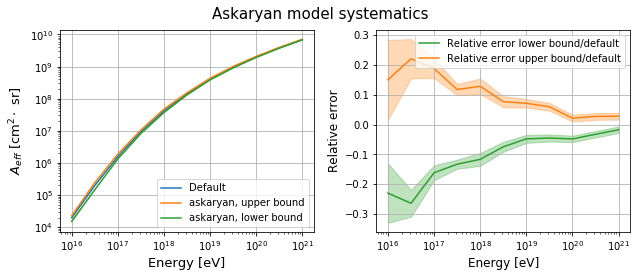

In [6]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(9, 4))

ax[0].loglog(default["Energy"], default["Aeff"], label="Default")
ax[0].plot(askaryan_up["Energy"], askaryan_up["Aeff"], label="askaryan, upper bound")
ax[0].plot(askaryan_low["Energy"], askaryan_low["Aeff"], label="askaryan, lower bound")

ax[0].fill_between(default["Energy"],default["Aeff"]-default["Err"],default["Aeff"]+default["Err"], alpha=0.5)
ax[0].fill_between(askaryan_up["Energy"],askaryan_up["Aeff"]-askaryan_up["Err"],askaryan_up["Aeff"]+askaryan_up["Err"], alpha=0.5)
ax[0].fill_between(askaryan_low["Energy"],askaryan_low["Aeff"]-askaryan_low["Err"],askaryan_low["Aeff"]+askaryan_low["Err"], alpha=0.5)


ax[0].set_xlabel("Energy [eV]",fontsize=13)
# plt.title("Comparison std & upper bound of L_atten", fontsize=12)
ax[0].set_ylabel("$A_{eff}$ [cm$^2 \cdot$ sr]",fontsize=13)
ax[0].grid()
ax[0].legend()

####

ax[1].plot(askaryan_low["Energy"],(askaryan_low["Aeff"]-default["Aeff"])/default["Aeff"],c="C2",label="Relative error lower bound/default")
ratio2 = (askaryan_low["Aeff"]-default["Aeff"])/default["Aeff"]
err_ratio2 = np.sqrt((askaryan_low["Err"]/default["Aeff"])**2+(askaryan_low["Aeff"]*default["Err"]/default["Aeff"]**2)**2)
ax[1].fill_between(askaryan_low["Energy"],ratio2-err_ratio2,ratio2+err_ratio2, color="C2",alpha=0.3)

ax[1].plot(askaryan_up["Energy"],(askaryan_up["Aeff"]-default["Aeff"])/default["Aeff"],c="C1", label="Relative error upper bound/default")
ratio = (askaryan_up["Aeff"]-default["Aeff"])/default["Aeff"]
err_ratio = np.sqrt((askaryan_up["Err"]/default["Aeff"])**2+(askaryan_up["Aeff"]*default["Err"]/default["Aeff"]**2)**2)
ax[1].fill_between(askaryan_up["Energy"],ratio-err_ratio,ratio+err_ratio,color="C1",alpha=0.3)

ax[1].set_xscale('log')
# plt.title("abs(with-without)/with", fontsize=14)
ax[1].set_ylabel("Relative error", fontsize=12)
ax[1].set_xlabel("Energy [eV]", fontsize=12)
ax[1].grid()

plt.legend(loc='best')
plt.suptitle("Askaryan model systematics", fontsize=15)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.savefig("/users/PAS0654/osu8354/ARA/AraSim/AraSim_versions/a23_4yr_diffuse_simconfigs/results/plots/Aeff_comparison_askaryan.png", dpi=250)
askaryan_low.to_csv("/users/PAS0654/osu8354/ARA/AraSim/AraSim_versions/a23_4yr_diffuse_simconfigs/results/askaryan_low_systematics.csv", index=False, index_label=False)
askaryan_up.to_csv("/users/PAS0654/osu8354/ARA/AraSim/AraSim_versions/a23_4yr_diffuse_simconfigs/results/askaryan_up_systematics.csv", index=False, index_label=False)


#### Histogram of passed events

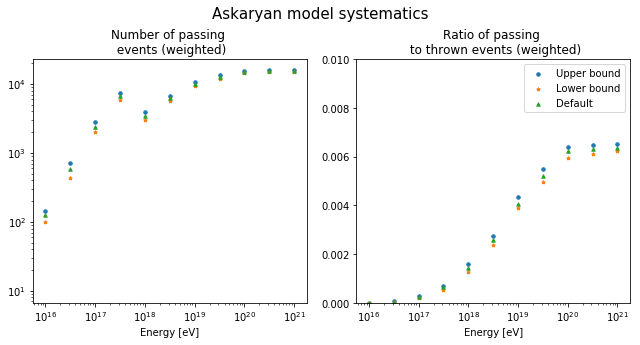

In [7]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(9, 5))

axes[0].scatter(askaryan_up["Energy"],askaryan_up["Npassed"], s=12, label="Upper bound")
axes[0].scatter(askaryan_low["Energy"],askaryan_low["Npassed"], s=12,marker="*", label="Lower bound")
axes[0].scatter(default["Energy"],default["Npassed"], s=12,marker="^", label="Default")

axes[0].set_xscale('log')
axes[0].set_yscale('log')
axes[0].set_title("Number of passing \n events (weighted)")
axes[0].set_xlabel("Energy [eV]")


axes[1].scatter(askaryan_up["Energy"],askaryan_up["Npassed"]/askaryan_up["Nthrown"],s=12, label="Upper bound")
axes[1].scatter(askaryan_low["Energy"],askaryan_low["Npassed"]/askaryan_low["Nthrown"],s=12, marker="*", label="Lower bound")
axes[1].scatter(default["Energy"],default["Npassed"]/default["Nthrown"],s=12, marker="^", label="Default")

axes[1].set_xscale('log')
axes[1].set_title("Ratio of passing \n to thrown events (weighted)")
axes[1].set_xlabel("Energy [eV]")
axes[1].set_ylim(0,0.01)

# axes[1].set_yscale('log')
plt.legend()
plt.suptitle("Askaryan model systematics", fontsize=15)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()
fig.savefig("/users/PAS0654/osu8354/ARA/AraSim/AraSim_versions/a23_4yr_diffuse_simconfigs/results/plots/askaryan_passing.png", dpi=250)

## Latten ice model

#### Effective volume

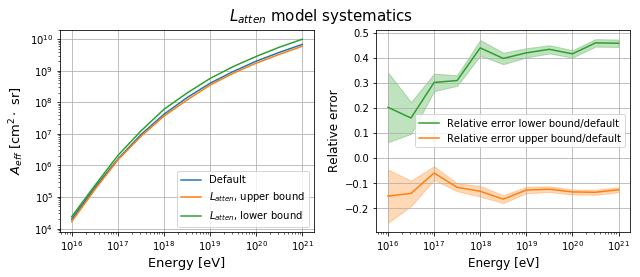

In [8]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(9, 4))

ax[0].loglog(default["Energy"], default["Aeff"], label="Default")
ax[0].plot(Latten_up["Energy"], Latten_up["Aeff"], label="$L_{atten}$, upper bound")
ax[0].plot(Latten_low["Energy"], Latten_low["Aeff"], label="$L_{atten}$, lower bound")

ax[0].fill_between(default["Energy"],default["Aeff"]-default["Err"],default["Aeff"]+default["Err"], alpha=0.5)
ax[0].fill_between(Latten_up["Energy"],Latten_up["Aeff"]-Latten_up["Err"],Latten_up["Aeff"]+Latten_up["Err"], alpha=0.5)
ax[0].fill_between(Latten_low["Energy"],Latten_low["Aeff"]-Latten_low["Err"],Latten_low["Aeff"]+Latten_low["Err"], alpha=0.5)


ax[0].set_xlabel("Energy [eV]",fontsize=13)
# plt.title("Comparison std & upper bound of L_atten", fontsize=12)
ax[0].set_ylabel("$A_{eff}$ [cm$^2 \cdot$ sr]",fontsize=13)
ax[0].grid()
ax[0].legend()

####

ax[1].plot(Latten_low["Energy"],(Latten_low["Aeff"]-default["Aeff"])/default["Aeff"],c="C2",label="Relative error lower bound/default")
ratio2 = (Latten_low["Aeff"]-default["Aeff"])/default["Aeff"]
err_ratio2 = np.sqrt((Latten_low["Err"]/default["Aeff"])**2+(Latten_low["Aeff"]*default["Err"]/default["Aeff"]**2)**2)
ax[1].fill_between(Latten_low["Energy"],ratio2-err_ratio2,ratio2+err_ratio2, color="C2",alpha=0.3)

ax[1].plot(Latten_up["Energy"],(Latten_up["Aeff"]-default["Aeff"])/default["Aeff"],c="C1", label="Relative error upper bound/default")
ratio = (Latten_up["Aeff"]-default["Aeff"])/default["Aeff"]
err_ratio = np.sqrt((Latten_up["Err"]/default["Aeff"])**2+(Latten_up["Aeff"]*default["Err"]/default["Aeff"]**2)**2)
ax[1].fill_between(Latten_up["Energy"],ratio-err_ratio,ratio+err_ratio,color="C1",alpha=0.3)

ax[1].set_xscale('log')
# plt.title("abs(with-without)/with", fontsize=14)
ax[1].set_ylabel("Relative error", fontsize=12)
ax[1].set_xlabel("Energy [eV]", fontsize=12)
ax[1].grid()

plt.legend(loc='best')
plt.suptitle("$L_{atten}$ model systematics", fontsize=15)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.savefig("/users/PAS0654/osu8354/ARA/AraSim/AraSim_versions/a23_4yr_diffuse_simconfigs/results/plots/Aeff_comparison_Latten.png", dpi=250)
Latten_low.to_csv("/users/PAS0654/osu8354/ARA/AraSim/AraSim_versions/a23_4yr_diffuse_simconfigs/results/Latten_low_systematics.csv", index=False, index_label=False)
Latten_up.to_csv("/users/PAS0654/osu8354/ARA/AraSim/AraSim_versions/a23_4yr_diffuse_simconfigs/results/Latten_up_systematics.csv", index=False, index_label=False)


#### Histogram of passed events

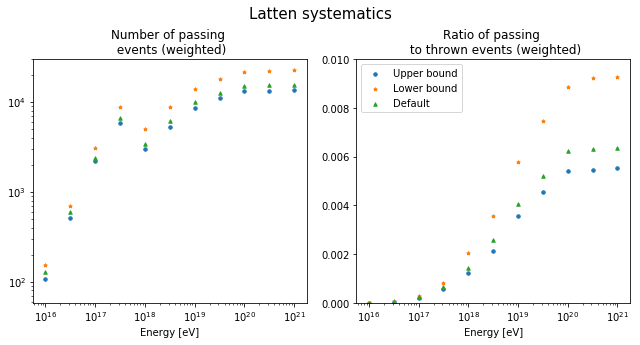

In [9]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(9, 5))

axes[0].scatter(Latten_up["Energy"],Latten_up["Npassed"], s=12, label="Upper bound")
axes[0].scatter(Latten_low["Energy"],Latten_low["Npassed"], s=12,marker="*", label="Lower bound")
axes[0].scatter(default["Energy"],default["Npassed"], s=12,marker="^", label="Default")

axes[0].set_xscale('log')
axes[0].set_yscale('log')
axes[0].set_title("Number of passing \n events (weighted)")
axes[0].set_xlabel("Energy [eV]")


axes[1].scatter(Latten_up["Energy"],Latten_up["Npassed"]/Latten_up["Nthrown"],s=12, label="Upper bound")
axes[1].scatter(Latten_low["Energy"],Latten_low["Npassed"]/Latten_low["Nthrown"],s=12, marker="*", label="Lower bound")
axes[1].scatter(default["Energy"],default["Npassed"]/default["Nthrown"],s=12, marker="^", label="Default")

axes[1].set_xscale('log')
axes[1].set_title("Ratio of passing \n to thrown events (weighted)")
axes[1].set_xlabel("Energy [eV]")
axes[1].set_ylim(0,0.01)

# axes[1].set_yscale('log')
plt.legend()
plt.suptitle("Latten systematics", fontsize=15)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()
fig.savefig("/users/PAS0654/osu8354/ARA/AraSim/AraSim_versions/a23_4yr_diffuse_simconfigs/results/plots/Latten_passing.png", dpi=250)

## n(z)

#### Effective volume

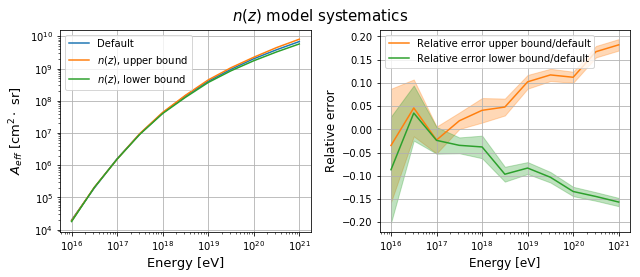

In [5]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(9, 4))

ax[0].loglog(default["Energy"], default["Aeff"], label="Default")
ax[0].plot(nofz_up["Energy"], nofz_up["Aeff"], label="$n(z)$, upper bound")
ax[0].plot(nofz_low["Energy"], nofz_low["Aeff"], label="$n(z)$, lower bound")

ax[0].fill_between(default["Energy"],default["Aeff"]-default["Err"],default["Aeff"]+default["Err"], alpha=0.5)
ax[0].fill_between(nofz_up["Energy"],nofz_up["Aeff"]-nofz_up["Err"],nofz_up["Aeff"]+nofz_up["Err"], alpha=0.5)
ax[0].fill_between(nofz_low["Energy"],nofz_low["Aeff"]-nofz_low["Err"],nofz_low["Aeff"]+nofz_low["Err"], alpha=0.5)


ax[0].set_xlabel("Energy [eV]",fontsize=13)
# plt.title("Comparison std & upper bound of L_atten", fontsize=12)
ax[0].set_ylabel("$A_{eff}$ [cm$^2 \cdot$ sr]",fontsize=13)
ax[0].grid()
ax[0].legend()

####
ax[1].plot(nofz_up["Energy"],(nofz_up["Aeff"]-default["Aeff"])/default["Aeff"],c="C1", label="Relative error upper bound/default")
ratio = (nofz_up["Aeff"]-default["Aeff"])/default["Aeff"]
err_ratio = np.sqrt((nofz_up["Err"]/default["Aeff"])**2+(nofz_up["Aeff"]*default["Err"]/default["Aeff"]**2)**2)
ax[1].fill_between(nofz_up["Energy"],ratio-err_ratio,ratio+err_ratio,color="C1",alpha=0.3)


ax[1].plot(nofz_low["Energy"],(nofz_low["Aeff"]-default["Aeff"])/default["Aeff"],c="C2",label="Relative error lower bound/default")
ratio2 = (nofz_low["Aeff"]-default["Aeff"])/default["Aeff"]
err_ratio2 = np.sqrt((nofz_low["Err"]/default["Aeff"])**2+(nofz_low["Aeff"]*default["Err"]/default["Aeff"]**2)**2)
ax[1].fill_between(nofz_low["Energy"],ratio2-err_ratio2,ratio2+err_ratio2, color="C2",alpha=0.3)

ax[1].set_xscale('log')
# plt.title("abs(with-without)/with", fontsize=14)
ax[1].set_ylabel("Relative error", fontsize=12)
ax[1].set_xlabel("Energy [eV]", fontsize=12)
ax[1].grid()

plt.legend(loc='best')
plt.suptitle("$n(z)$ model systematics", fontsize=15)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.savefig("/users/PAS0654/osu8354/ARA/AraSim/AraSim_versions/a23_4yr_diffuse_simconfigs/results/plots/Aeff_comparison_nofz.png", dpi=250)
nofz_low.to_csv("/users/PAS0654/osu8354/ARA/AraSim/AraSim_versions/a23_4yr_diffuse_simconfigs/results/nofz_low_systematics.csv", index=False, index_label=False)
nofz_up.to_csv("/users/PAS0654/osu8354/ARA/AraSim/AraSim_versions/a23_4yr_diffuse_simconfigs/results/nofz_up_systematics.csv", index=False, index_label=False)


#### Histogram of passed events

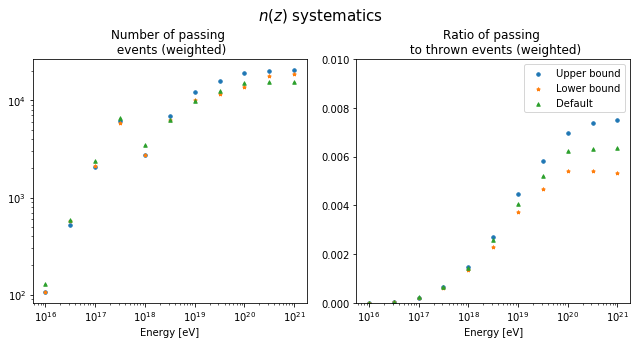

In [11]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(9, 5))

axes[0].scatter(nofz_up["Energy"],nofz_up["Npassed"], s=12, label="Upper bound")
axes[0].scatter(nofz_low["Energy"],nofz_low["Npassed"], s=12,marker="*", label="Lower bound")
axes[0].scatter(default["Energy"],default["Npassed"], s=12,marker="^", label="Default")

axes[0].set_xscale('log')
axes[0].set_yscale('log')
axes[0].set_title("Number of passing \n events (weighted)")
axes[0].set_xlabel("Energy [eV]")


axes[1].scatter(nofz_up["Energy"],nofz_up["Npassed"]/nofz_up["Nthrown"],s=12, label="Upper bound")
axes[1].scatter(nofz_low["Energy"],nofz_low["Npassed"]/nofz_low["Nthrown"],s=12, marker="*", label="Lower bound")
axes[1].scatter(default["Energy"],default["Npassed"]/default["Nthrown"],s=12, marker="^", label="Default")

axes[1].set_xscale('log')
axes[1].set_title("Ratio of passing \n to thrown events (weighted)")
axes[1].set_xlabel("Energy [eV]")
axes[1].set_ylim(0,0.01)

# axes[1].set_yscale('log')
plt.legend()
plt.suptitle("$n(z)$ systematics", fontsize=15)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()
fig.savefig("/users/PAS0654/osu8354/ARA/AraSim/AraSim_versions/a23_4yr_diffuse_simconfigs/results/plots/nofz_passing.png", dpi=250)



# All together now

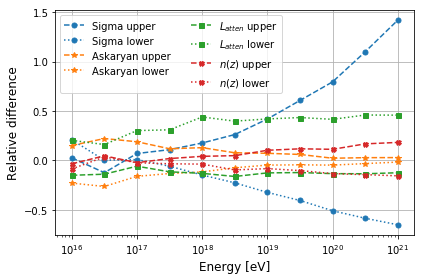

In [108]:
ratio_sigma_up = (sigma_up["Aeff"]-default["Aeff"])/default["Aeff"]
ratio_sigma_low = (sigma_low["Aeff"]-default["Aeff"])/default["Aeff"]

ratio_askaryan_up = (askaryan_up["Aeff"]-default["Aeff"])/default["Aeff"]
ratio_askaryan_low = (askaryan_low["Aeff"]-default["Aeff"])/default["Aeff"]

ratio_Latten_up = (Latten_up["Aeff"]-default["Aeff"])/default["Aeff"]
ratio_Latten_low = (Latten_low["Aeff"]-default["Aeff"])/default["Aeff"]

ratio_nofz_up = (nofz_up["Aeff"]-default["Aeff"])/default["Aeff"]
ratio_nofz_low = (nofz_low["Aeff"]-default["Aeff"])/default["Aeff"]

plt.plot(nofz_up["Energy"],ratio_sigma_up ,"--", marker="o",markersize="5",color="C0", label="Sigma upper")
plt.plot(nofz_up["Energy"],ratio_sigma_low,linestyle="dotted",marker="o", markersize="5",color="C0", label="Sigma lower")
plt.plot(nofz_up["Energy"],ratio_askaryan_up,"--", marker="*",markersize="6",color="C1", label="Askaryan upper")
plt.plot(nofz_up["Energy"],ratio_askaryan_low,linestyle="dotted",marker="*", markersize="6",color="C1", label="Askaryan lower")
plt.plot(nofz_up["Energy"],ratio_Latten_up,"--", marker="s",markersize="5",color="C2", label="$L_{atten}$ upper")
plt.plot(nofz_up["Energy"],ratio_Latten_low,linestyle="dotted",marker="s", markersize="5",color="C2", label="$L_{atten}$ lower")
plt.plot(nofz_up["Energy"],ratio_nofz_up,"--", marker="X",markersize="5",color="C3", label="$n(z)$ upper")
plt.plot(nofz_up["Energy"],ratio_nofz_low,linestyle="dotted",marker="X", markersize="5",color="C3", label="$n(z)$ lower")
plt.legend(bbox_to_anchor=(0, 1), loc='upper left', ncol=2)
# plt.ylim(-0.2,0.2)
plt.grid()
plt.xscale("log")
plt.ylabel("Relative difference", fontsize=12)
plt.xlabel("Energy [eV]", fontsize=12)
plt.tight_layout()

plt.savefig("/users/PAS0654/osu8354/ARA/AraSim/AraSim_versions/a23_4yr_diffuse_simconfigs/results/plots/rel_diff_all.png", dpi=250)
